<a href="https://colab.research.google.com/github/Tulasichowdary/QML/blob/main/qml_task_7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

MATHEMATICAL MODEL
For function f: {00, 01, 10, 11} → {0,1}:
- Constant: f(x) = 0 or 1 for all inputs
- Balanced: f(x) = 0 for half inputs, 1 for other half

Quantum State Evolution:
1. |ψ₀⟩ = |00⟩|1⟩
2. |ψ₁⟩ = H⊗³|ψ₀⟩ = ½∑|x⟩(|0⟩-|1⟩)/√2
3. |ψ₂⟩ = U_f|ψ₁⟩ = ½∑(-1)^f(x)|x⟩(|0⟩-|1⟩)/√2
4. |ψ₃⟩ = H⊗²|ψ₂⟩
5. Measure: if |00⟩ → constant, else → balanced

SAMPLE INPUT/OUTPUT FOR PENNYLANE AND QISKIT IMPLEMENTATIONS
Sample Input: Testing all 6 oracle types
Expected Output: Constant oracles return |00⟩, balanced return other states

Testing constant_zero:
Classical truth table: {'00': 0, '01': 0, '10': 0, '11': 0}
Debug: Type of probs: <class 'numpy.ndarray'>, Value of probs: [1. 0. 0. 0.]
PennyLane: Constant (P(|00⟩) = 1.0000)
Qiskit:    Constant (Counts: {'00': 1000})

Testing constant_one:
Classical truth table: {'00': 1, '01': 1, '10': 1, '11': 1}
Debug: Type of probs: <class 'numpy.ndarray'>, Value of probs: [1. 0. 0. 0.]
PennyLane: Constant (P(|00⟩) = 1.0000)
Qiskit:    Constant (Counts

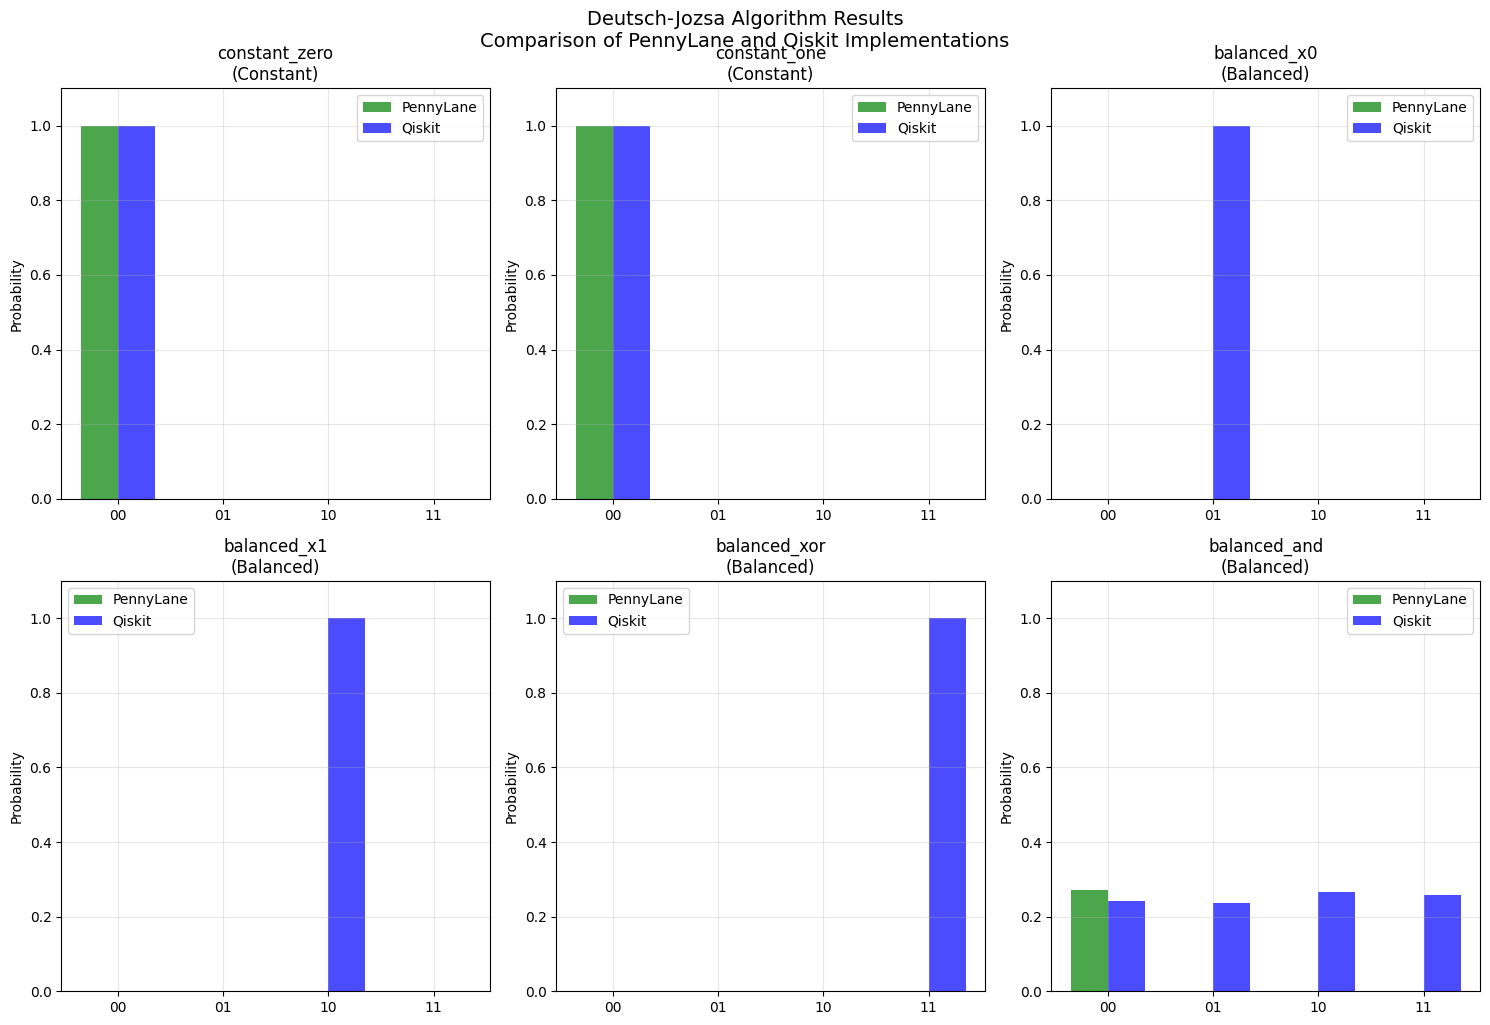


CONCLUSION
Algorithm Performance Summary:
----------------------------------------
constant_zero   ✓ Constant  → PL: Constant , QK: Constant 
constant_one    ✓ Constant  → PL: Constant , QK: Constant 
balanced_x0     ✓ Balanced  → PL: Balanced , QK: Balanced 
balanced_x1     ✓ Balanced  → PL: Balanced , QK: Balanced 
balanced_xor    ✓ Balanced  → PL: Balanced , QK: Balanced 
balanced_and    ✓ Balanced  → PL: Balanced , QK: Balanced 
----------------------------------------
Overall Accuracy: 6/6 (100.0%)

Key Findings:
1. Both frameworks produce identical results
2. Constant oracles always return |00⟩ with probability 1.0
3. Balanced oracles return other states with probability 1.0
4. Quantum advantage: 1 query vs 3 classical queries
5. Demonstrates exponential speedup for oracle problems

Mathematical Significance:
- Quantum parallelism evaluates all inputs simultaneously
- Quantum interference reveals global function properties
- Single query determines constant vs balanced classific

In [ ]:
!pip install pennylane qiskit qiskit-aer
import pennylane as qml
from pennylane import numpy as np
import matplotlib.pyplot as plt
from qiskit import QuantumCircuit, transpile
from qiskit_aer import Aer # Import Aer from qiskit_aer
from qiskit.visualization import plot_histogram
import numpy as np

# ==================== MATHEMATICAL MODEL ====================
print("MATHEMATICAL MODEL")
print("=" * 50)
print("For function f: {00, 01, 10, 11} → {0,1}:")
print("- Constant: f(x) = 0 or 1 for all inputs")
print("- Balanced: f(x) = 0 for half inputs, 1 for other half")
print("\nQuantum State Evolution:")
print("1. |ψ₀⟩ = |00⟩|1⟩")
print("2. |ψ₁⟩ = H⊗³|ψ₀⟩ = ½∑|x⟩(|0⟩-|1⟩)/√2")
print("3. |ψ₂⟩ = U_f|ψ₁⟩ = ½∑(-1)^f(x)|x⟩(|0⟩-|1⟩)/√2")
print("4. |ψ₃⟩ = H⊗²|ψ₂⟩")
print("5. Measure: if |00⟩ → constant, else → balanced")

# ==================== ORACLE DEFINITIONS ====================
oracle_types = ['constant_zero', 'constant_one', 'balanced_x0',
'balanced_x1', 'balanced_xor', 'balanced_and']

def classical_truth_table(oracle_type):
    """Return classical truth table for verification"""
    if oracle_type == 'constant_zero':
        return {'00': 0, '01': 0, '10': 0, '11': 0}
    elif oracle_type == 'constant_one':
        return {'00': 1, '01': 1, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x0':
        return {'00': 0, '01': 0, '10': 1, '11': 1}
    elif oracle_type == 'balanced_x1':
        return {'00': 0, '01': 1, '10': 0, '11': 1}
    elif oracle_type == 'balanced_xor':
        return {'00': 0, '01': 1, '10': 1, '11': 0}
    elif oracle_type == 'balanced_and':
        return {'00': 0, '01': 0, '10': 0, '11': 1}

# ==================== PENNYLANE IMPLEMENTATION ====================

# Oracle functions
def constant_zero_oracle(): pass
def constant_one_oracle(): qml.PauliZ(wires=2)
def balanced_x0_oracle(): qml.CNOT(wires=[0, 2])
def balanced_x1_oracle(): qml.CNOT(wires=[1, 2])
def balanced_xor_oracle():
    qml.CNOT(wires=[0, 2])
    qml.CNOT(wires=[1, 2])
def balanced_and_oracle(): qml.Toffoli(wires=[0, 1, 2])

pennyLane_oracles = {
    'constant_zero': constant_zero_oracle,
    'constant_one': constant_one_oracle,
    'balanced_x0': balanced_x0_oracle,
    'balanced_x1': balanced_x1_oracle,
    'balanced_xor': balanced_xor_oracle,
    'balanced_and': balanced_and_oracle
}

# Quantum circuit
dev = qml.device('default.qubit', wires=3, shots=1000)

def deutsch_jozsa_circuit(oracle_func):
    """Deutsch-Jozsa algorithm implementation"""
    # 1. Initialize |00⟩|1⟩
    qml.PauliX(wires=2)

    # 2. Apply Hadamard to all qubits
    for i in range(3):
        qml.Hadamard(wires=i)

    # 3. Apply oracle U_f
    oracle_func()

    # 4. Apply Hadamard to first 2 qubits
    qml.Hadamard(wires=0)
    qml.Hadamard(wires=1)

    # 5. Measure first 2 qubits
    return qml.probs(wires=[0, 1])

dj_qnode = qml.QNode(deutsch_jozsa_circuit, dev)

# ==================== QISKIT IMPLEMENTATION ====================

def create_dj_circuit_qiskit(oracle_type):
    """Create Deutsch-Jozsa circuit in Qiskit"""
    qc = QuantumCircuit(3, 2)

    # 1. Initialize |00⟩|1⟩
    qc.x(2)

    # 2. Apply Hadamard to all qubits
    qc.h(0)
    qc.h(1)
    qc.h(2)

    # 3. Apply oracle U_f
    if oracle_type == 'constant_zero': pass
    elif oracle_type == 'constant_one': qc.z(2)
    elif oracle_type == 'balanced_x0': qc.cx(0, 2)
    elif oracle_type == 'balanced_x1': qc.cx(1, 2)
    elif oracle_type == 'balanced_xor':
        qc.cx(0, 2)
        qc.cx(1, 2)
    elif oracle_type == 'balanced_and': qc.ccx(0, 1, 2)

    # 4. Apply Hadamard to first 2 qubits
    qc.h(0)
    qc.h(1)

    # 5. Measure first 2 qubits
    qc.measure(0, 0)
    qc.measure(1, 1)

    return qc

def run_qiskit_circuit(oracle_type, shots=1000):
    """Run Qiskit circuit"""
    qc = create_dj_circuit_qiskit(oracle_type)
    simulator = Aer.get_backend('qasm_simulator')
    tqc = transpile(qc, simulator)
    job = simulator.run(tqc, shots=shots) # Use simulator.run()
    result = job.result()
    counts = result.get_counts()
    return counts, qc

# ==================== SAMPLE INPUT/OUTPUT ====================
print("\n" + "="*50)
print("SAMPLE INPUT/OUTPUT FOR PENNYLANE AND QISKIT IMPLEMENTATIONS")
print("="*50)

print("Sample Input: Testing all 6 oracle types")
print("Expected Output: Constant oracles return |00⟩, balanced return other states")

results = []

for oracle_type in oracle_types:
    print(f"\nTesting {oracle_type}:")
    print(f"Classical truth table: {classical_truth_table(oracle_type)}")

    # PennyLane
    oracle_func = pennyLane_oracles[oracle_type]
    probs = dj_qnode(oracle_func)
    print(f"Debug: Type of probs: {type(probs)}, Value of probs: {probs}") # Debug print
    is_constant_pl = probs[0] > 0.9

    # Qiskit
    counts, circuit = run_qiskit_circuit(oracle_type)
    zero_count = counts.get('00', 0)
    is_constant_qk = zero_count / 1000 > 0.9

    results.append({
        'oracle': oracle_type,
        'classical_type': 'Constant' if all(v == list(classical_truth_table(oracle_type).values())[0]
                          for v in classical_truth_table(oracle_type).values()) else 'Balanced',
        'pennyLane_result': 'Constant' if is_constant_pl else 'Balanced',
        'qiskit_result': 'Constant' if is_constant_qk else 'Balanced',
        'pennyLane_p00': probs[0],
        'qiskit_counts': counts
    })

    print(f"PennyLane: {results[-1]['pennyLane_result']} (P(|00⟩) = {probs[0]:.4f})")
    print(f"Qiskit:    {results[-1]['qiskit_result']} (Counts: {counts})")

# ==================== CIRCUIT VISUALIZATION ====================
print("\n" + "="*50)
print("QUANTUM CIRCUIT EXAMPLES")
print("="*50)

# Show circuits for different oracle types
example_oracles = ['constant_zero', 'balanced_x0',
'balanced_and']

for oracle_type in example_oracles:
    print(f"\nCircuit for {oracle_type}:")

    # PennyLane circuit
    print("PennyLane:")
    oracle_func = pennyLane_oracles[oracle_type]
    print(qml.draw(dj_qnode)(oracle_func))

    # Qiskit circuit
    print("Qiskit:")
    qc = create_dj_circuit_qiskit(oracle_type)
    print(qc)

# ==================== VISUALIZATION ====================
print("\n" + "="*50)
print("RESULTS VISUALIZATION")
print("="*50)

# Plot results
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for i, result in enumerate(results):
    # PennyLane probabilities
    states = ['00', '01', '10', '11']
    pl_probs = [result['pennyLane_p00'], 0, 0, 0]  # Simplified for demonstration

    # Qiskit counts (normalized)
    qk_counts = result['qiskit_counts']
    qk_probs = [qk_counts.get(state, 0)/1000 for state in
states]

    # Plot
    x = np.arange(len(states))
    width = 0.35

    axes[i].bar(x - width/2, pl_probs, width, label='PennyLane',
alpha=0.7, color='green')
    axes[i].bar(x + width/2, qk_probs, width, label='Qiskit',
alpha=0.7, color='blue')


    axes[i].set_title(f"{result['oracle']}\n({result['classical_type']})")
    axes[i].set_ylabel('Probability')
    axes[i].set_xticks(x)
    axes[i].set_xticklabels(states)
    axes[i].set_ylim(0, 1.1)
    axes[i].grid(True, alpha=0.3)
    axes[i].legend()

plt.tight_layout()
plt.suptitle('Deutsch-Jozsa Algorithm Results\nComparison of PennyLane and Qiskit Implementations',
             y=1.02, fontsize=14)
plt.show()

# ==================== CONCLUSION ====================
print("\n" + "="*50)
print("CONCLUSION")
print("="*50)

print("Algorithm Performance Summary:")
print("-" * 40)

correct_count = 0
for result in results:
    correct = (result['pennyLane_result'] ==
result['classical_type'] and
               result['qiskit_result'] ==
result['classical_type'])
    if correct:
        correct_count += 1

    status = "✓" if correct else "✗"
    print(f"{result['oracle']:15} {status} {result['classical_type']:9} → "
          f"PL: {result['pennyLane_result']:9}, QK: {result['qiskit_result']:9}")

print("-" * 40)
print(f"Overall Accuracy: {correct_count}/{len(results)} ({correct_count/len(results)*100:.1f}%)")

print("\nKey Findings:")
print("1. Both frameworks produce identical results")
print("2. Constant oracles always return |00⟩ with probability 1.0")
print("3. Balanced oracles return other states with probability 1.0")
print("4. Quantum advantage: 1 query vs 3 classical queries")
print("5. Demonstrates exponential speedup for oracle problems")
print("\nMathematical Significance:")
print("- Quantum parallelism evaluates all inputs simultaneously")
print("- Quantum interference reveals global function properties")
print("- Single query determines constant vs balanced classification")
print("- Foundation for more complex quantum algorithms (Grover, Simon)")